Solution: [6, 8, 2, 4, 1, 7, 5, 3]


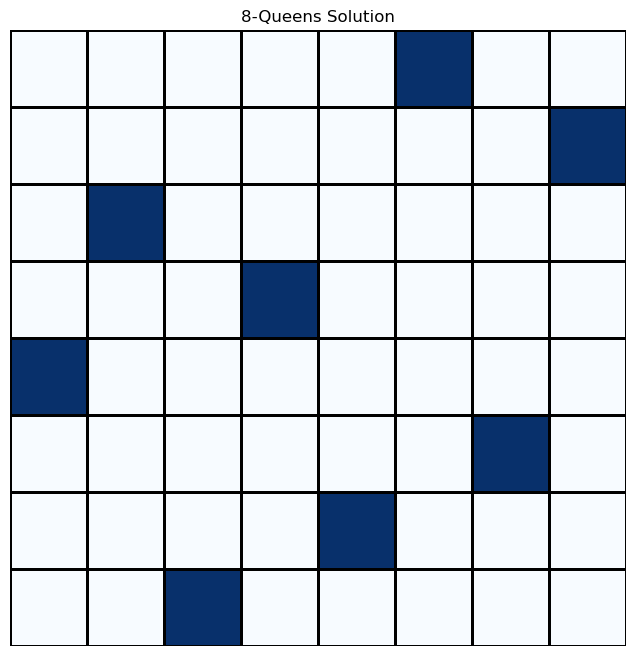

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def fitness(chromosome):
    n = len(chromosome)
    max_pairs = n * (n - 1) // 2
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if abs(i - j) == abs(chromosome[i] - chromosome[j]):
                conflicts += 1
    return max_pairs - conflicts

def create_population(size, n):
    return [random.sample(range(1, n + 1), n) for _ in range(size)]

def selection(population):
    return sorted(population, key=fitness, reverse=True)[:len(population)//2]

def crossover(parent1, parent2):
    n = len(parent1)
    point = random.randint(1, n - 2)
    child = parent1[:point] + [gene for gene in parent2 if gene not in parent1[:point]]
    return child

def mutate(chromosome, mutation_rate=0.2):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(chromosome)), 2)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    return chromosome

def genetic_algorithm(n=8, pop_size=100, max_generations=1000):
    population = create_population(pop_size, n)
    for generation in range(max_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < pop_size:
            p1, p2 = random.sample(population, 2)
            child = mutate(crossover(p1, p2))
            new_population.append(child)
        population = new_population
        best = max(population, key=fitness)
        if fitness(best) == n * (n - 1) // 2:
            return best
    return max(population, key=fitness)

def visualize_board(solution):
    n = len(solution)
    board = np.zeros((n, n))
    for row, col in enumerate(solution):
        board[row, col - 1] = 1
    plt.figure(figsize=(n, n))
    sns.heatmap(board, cmap="Blues", linewidths=1, linecolor="black", cbar=False, xticklabels=False, yticklabels=False, square=True)
    plt.title("8-Queens Solution")
    plt.show()

solution = genetic_algorithm(n=8)
print("Solution:", solution)
visualize_board(solution)


Solution for 8-Queens: [6, 3, 1, 8, 4, 2, 7, 5]


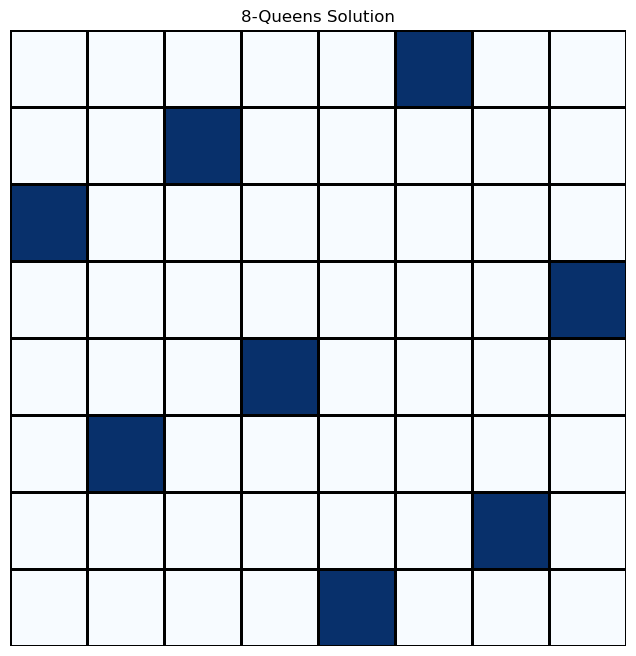

Solution for 10-Queens: [5, 9, 2, 10, 3, 6, 8, 1, 4, 7]


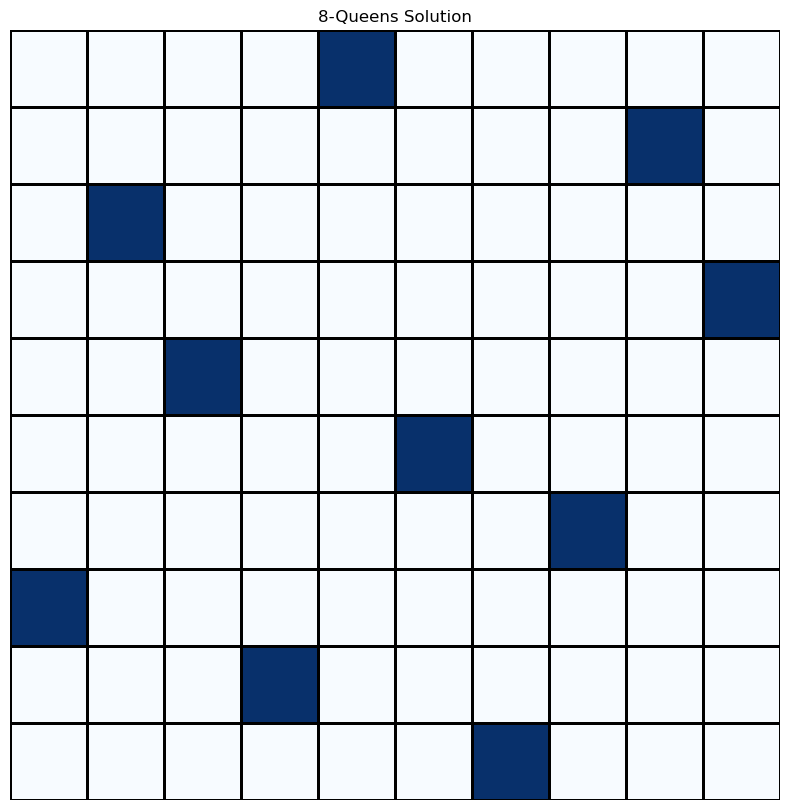

Solution for 20-Queens: [10, 18, 13, 6, 8, 17, 11, 1, 15, 7, 3, 19, 14, 12, 20, 5, 2, 4, 9, 16]


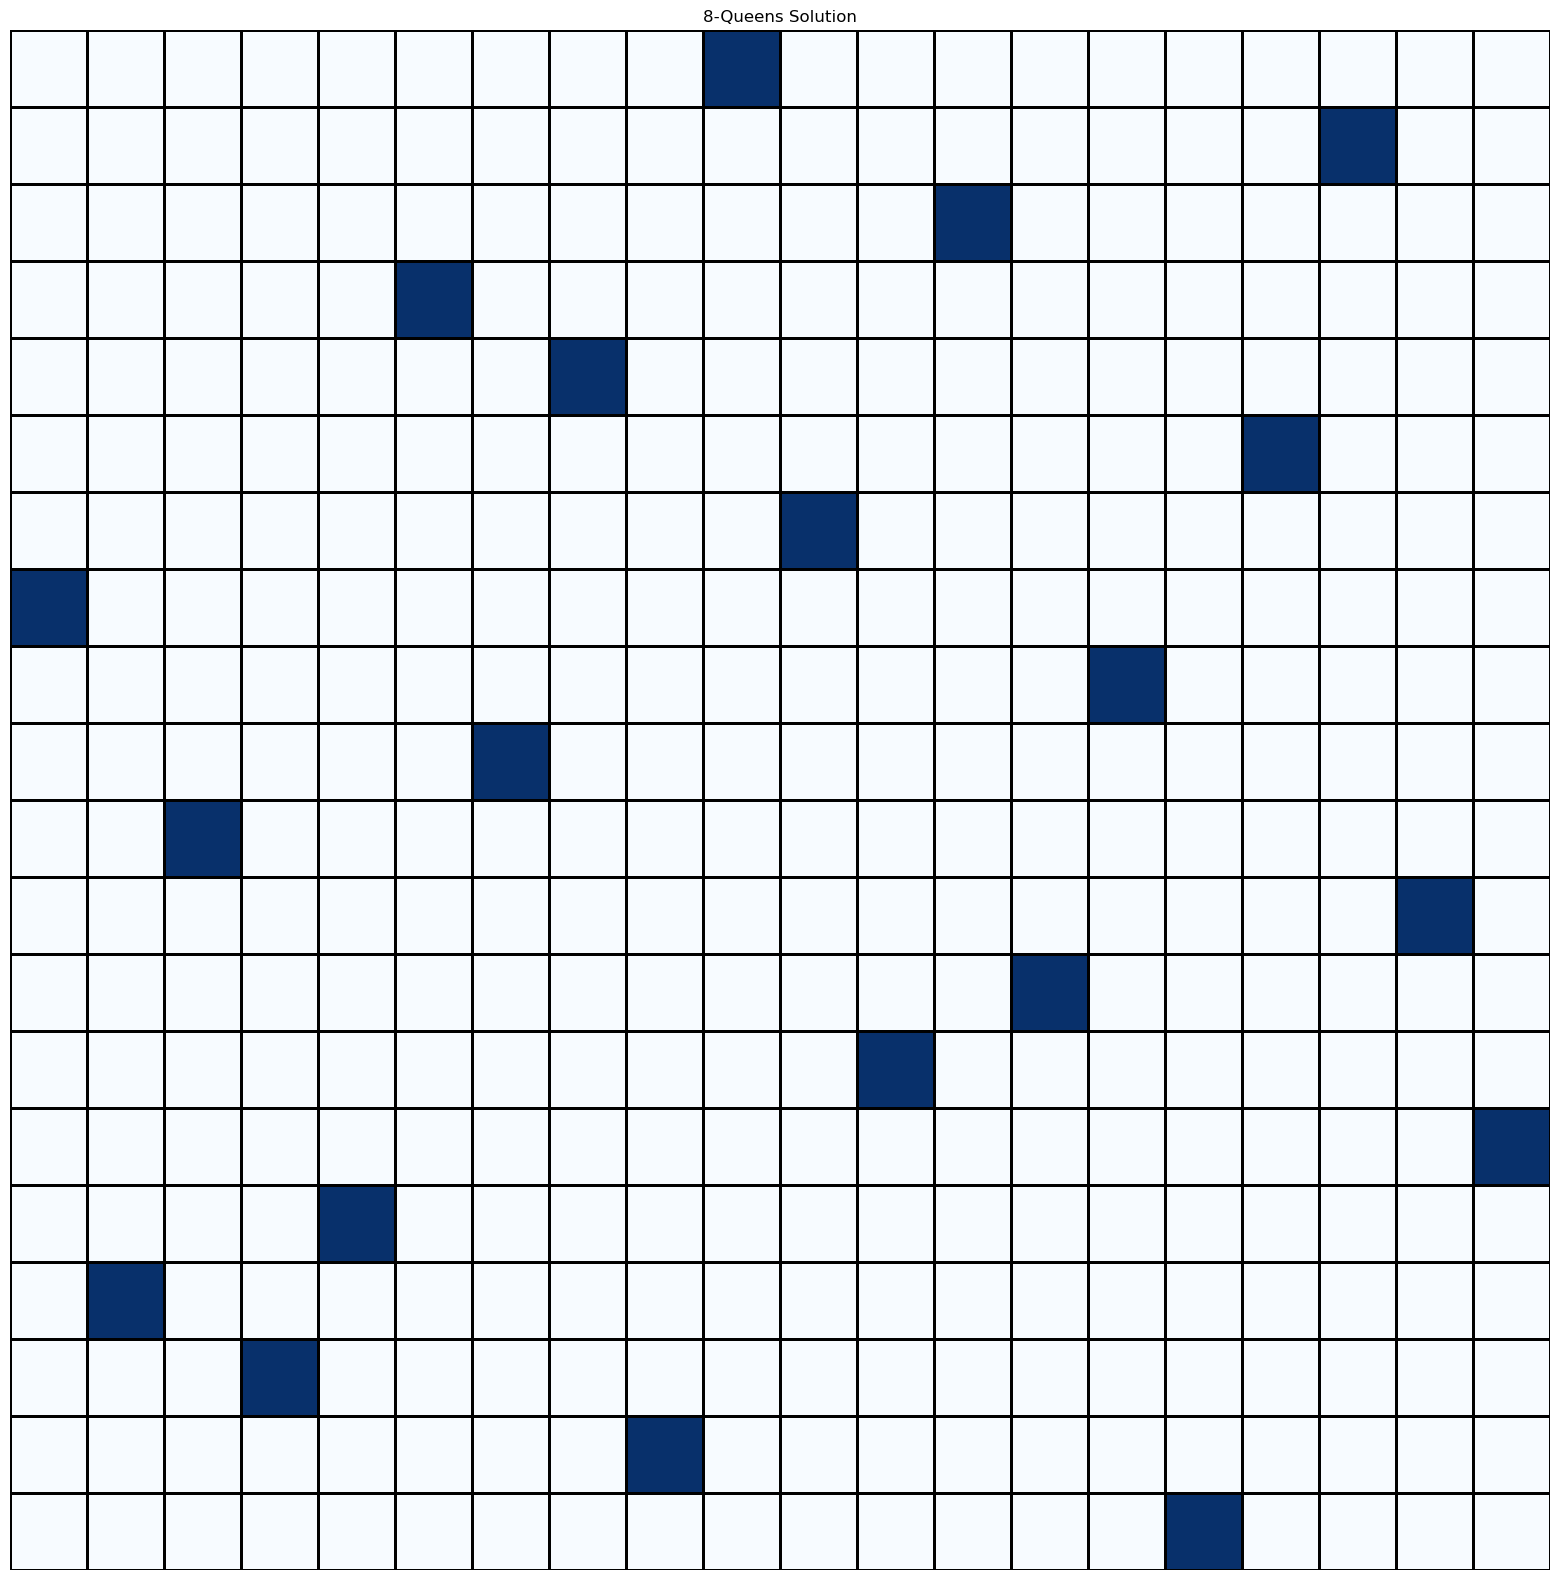

In [2]:
for n in [8, 10, 20]:
    solution = genetic_algorithm(n=n)
    print(f"Solution for {n}-Queens:", solution)
    visualize_board(solution)


Genetic Algorithm Solution for 8-Queens: [6, 1, 5, 2, 8, 3, 7, 4]
States Explored by GA: 300


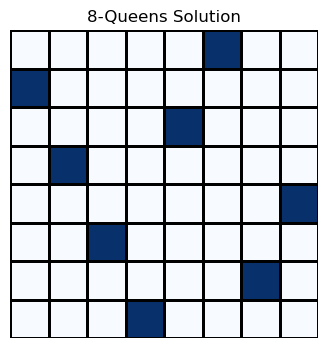

A* Solution for 8-Queens: (4, 6, 1, 3, 5, 3, 8, 3)
States Explored by A*: 4


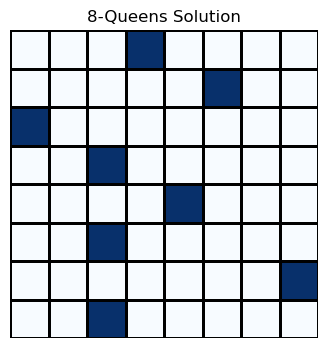

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq

def fitness(chromosome):
    n = len(chromosome)
    max_pairs = n * (n - 1) // 2
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if abs(i - j) == abs(chromosome[i] - chromosome[j]):
                conflicts += 1
    return max_pairs - conflicts

def create_population(size, n):
    return [random.sample(range(1, n + 1), n) for _ in range(size)]

def selection(population):
    return sorted(population, key=fitness, reverse=True)[:len(population)//2]

def crossover(parent1, parent2):
    n = len(parent1)
    point = random.randint(1, n - 2)
    child = parent1[:point] + [gene for gene in parent2 if gene not in parent1[:point]]
    return child

def mutate(chromosome, mutation_rate=0.2):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(chromosome)), 2)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    return chromosome

def genetic_algorithm(n=8, pop_size=100, max_generations=1000):
    population = create_population(pop_size, n)
    states_explored = 0
    for generation in range(max_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < pop_size:
            p1, p2 = random.sample(population, 2)
            child = mutate(crossover(p1, p2))
            new_population.append(child)
        population = new_population
        best = max(population, key=fitness)
        states_explored += len(population)
        if fitness(best) == n * (n - 1) // 2:
            return best, states_explored
    return max(population, key=fitness), states_explored

def visualize_board(solution):
    n = len(solution)
    board = np.zeros((n, n))
    for row, col in enumerate(solution):
        board[row, col - 1] = 1
    plt.figure(figsize=(n / 2, n / 2))
    sns.heatmap(board, cmap="Blues", linewidths=1, linecolor="black", cbar=False, xticklabels=False, yticklabels=False, square=True)
    plt.title(f"{n}-Queens Solution")
    plt.show()

def heuristic(state):
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if abs(i - j) == abs(state[i] - state[j]):
                conflicts += 1
    return conflicts

def a_star_n_queens(n=8):
    initial_state = tuple(random.sample(range(1, n + 1), n))
    pq = [(heuristic(initial_state), 0, initial_state)]
    explored = set()
    states_explored = 0
    
    while pq:
        _, cost, state = heapq.heappop(pq)
        if heuristic(state) == 0:
            return state, states_explored
        explored.add(state)
        states_explored += 1
        
        for i in range(n):
            for j in range(1, n + 1):
                if state[i] != j:
                    new_state = list(state)
                    new_state[i] = j
                    new_state = tuple(new_state)
                    if new_state not in explored:
                        heapq.heappush(pq, (heuristic(new_state) + cost + 1, cost + 1, new_state))
    return None, states_explored
n = 8
genetic_solution, ga_states = genetic_algorithm(n=n)
print(f"Genetic Algorithm Solution for {n}-Queens:", genetic_solution)
print(f"States Explored by GA: {ga_states}")
visualize_board(genetic_solution)

a_star_solution, a_star_states = a_star_n_queens(n=n)
print(f"A* Solution for {n}-Queens:", a_star_solution)
print(f"States Explored by A*: {a_star_states}")
visualize_board(a_star_solution)


8-Queens Solution (GA): [6, 4, 1, 5, 8, 2, 7, 3]
GA States Explored: 100


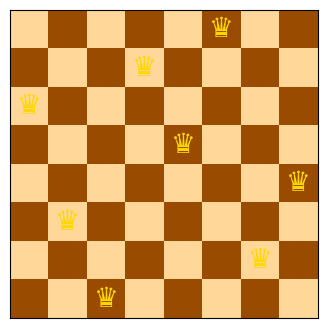

10-Queens Solution (GA): [2, 9, 3, 8, 10, 4, 6, 1, 5, 7]


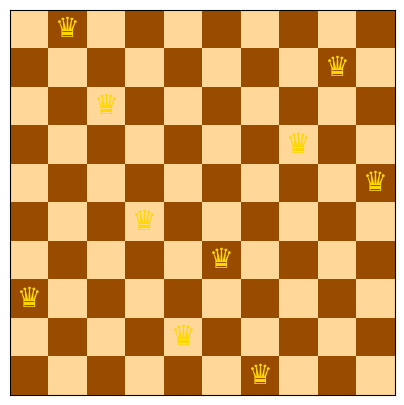

20-Queens Solution (GA): [13, 10, 7, 1, 14, 2, 20, 18, 4, 12, 5, 3, 19, 17, 16, 9, 6, 15, 11, 8]


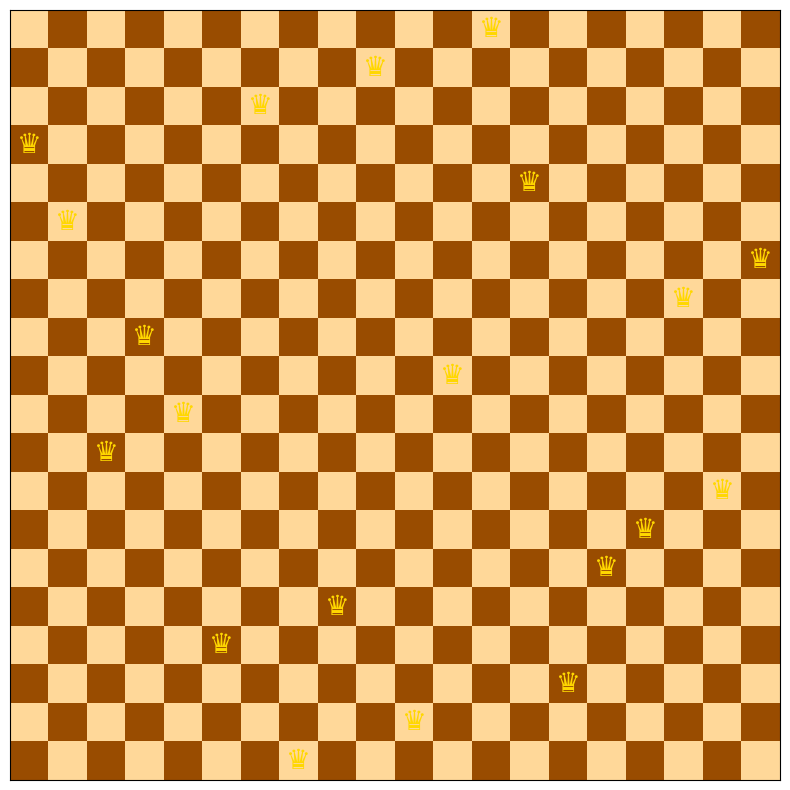

8-Queens Solution (A*): [1, 1, 1, 1, 1, 1, 1, 1]
A* States Explored: 8


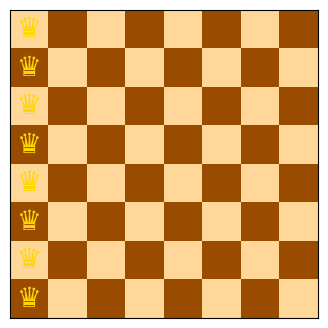


Comparison of GA vs A* for 8-Queens:
GA States Explored: 100
A* States Explored: 8


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq

def fitness(chromosome):
    n = len(chromosome)
    max_fitness = n * (n - 1) // 2  
    conflicts = 0

    for i in range(n):
        for j in range(i + 1, n):
            if abs(i - j) == abs(chromosome[i] - chromosome[j]):  
                conflicts += 1

    return max_fitness - conflicts, conflicts 

def generate_population(size, n):
    return [random.sample(range(1, n + 1), n) for _ in range(size)]

def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [f / total_fitness for f in fitness_scores]
    return random.choices(population, probabilities, k=2)

def crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    child = [None] * n
    child[start:end] = parent1[start:end]
    
    remaining = [gene for gene in parent2 if gene not in child]
    index = 0

    for i in range(n):
        if child[i] is None:
            child[i] = remaining[index]
            index += 1

    return child

def mutate(chromosome, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(chromosome)), 2)
        chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    return chromosome

def genetic_algorithm(n=8, pop_size=100, mutation_rate=0.1, generations=1000):
    population = generate_population(pop_size, n)
    states_explored = 0  

    for generation in range(generations):
        fitness_results = [fitness(ch) for ch in population]
        fitness_scores = [f[0] for f in fitness_results]

        if max(fitness_scores) == n * (n - 1) // 2:
            break

        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])

        population = sorted(population, key=lambda ch: fitness(ch)[0], reverse=True)[:2] + new_population
        states_explored += pop_size

    best_solution = max(population, key=lambda ch: fitness(ch)[0])
    return best_solution, states_explored

def visualize_board(solution):
    n = len(solution)
    board = np.zeros((n, n, 3)) 

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i, j] = [1.0, 0.85, 0.6]  
            else:
                board[i, j] = [0.6, 0.3, 0.0]  

    fig, ax = plt.subplots(figsize=(n/2, n/2))
    ax.imshow(board)

    for i in range(n):
        ax.text(solution[i] - 1, i, '♛', fontsize=20, ha='center', va='center', color='gold')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

def a_star_8_queens():
    n = 8
    initial_state = tuple(range(1, n + 1))
    heap = [(fitness(initial_state)[1], initial_state)]  
    visited = set()
    states_explored = 0

    while heap:
        conflicts, state = heapq.heappop(heap)
        states_explored += 1

        if conflicts == 0:  
            return list(state), states_explored

        if state in visited:
            continue
        visited.add(state)

        for i in range(n):
            for j in range(1, n + 1):
                if state[i] != j: 
                    new_state = list(state)
                    new_state[i] = j
                    heapq.heappush(heap, (fitness(tuple(new_state))[1], tuple(new_state)))

    return None, states_explored 

solution_8q_ga, ga_states = genetic_algorithm(n=8)
print("8-Queens Solution (GA):", solution_8q_ga)
print("GA States Explored:", ga_states)
visualize_board(solution_8q_ga)

solution_10q, _ = genetic_algorithm(n=10)
print("10-Queens Solution (GA):", solution_10q)
visualize_board(solution_10q)

solution_20q, _ = genetic_algorithm(n=20)
print("20-Queens Solution (GA):", solution_20q)
visualize_board(solution_20q)

solution_8q_a_star, a_star_states = a_star_8_queens()
print("8-Queens Solution (A*):", solution_8q_a_star)
print("A* States Explored:", a_star_states)
visualize_board(solution_8q_a_star)

print("\nComparison of GA vs A* for 8-Queens:")
print(f"GA States Explored: {ga_states}")
print(f"A* States Explored: {a_star_states}")